# pandasからpolarsへ

サンプルとなるcsvファイルを作る。パスは以下  
`../../data/animals.csv`

In [1]:
import os

import pandas as pd
import polars as pl

## 定数定義

In [2]:
INPUT_CSV_PATH = os.path.join('..','..','data','animals.csv')

## DataFrameの表示の違い

pandas

In [3]:
animals_pd = pd.read_csv(INPUT_CSV_PATH)
animals_pd

,animal,class,habitat,diet,lifespan,status,features,weight
0,dolphin,mammal,oceans/rivers,carnivore,40,least concern,high intelligence,150.0
1,duck,bird,wetlands,omnivore,8,least concern,waterproof feathers,3.0
2,elephant,mammal,savannah,herbivore,60,endangered,large ears and trunk,8000.0
3,ibis,bird,wetlands,omnivore,16,least concern,"long, curved bill",1.0
4,impala,mammal,savannah,herbivore,12,least concern,"long, curved horns",70.0
5,kudu,mammal,savannah,herbivore,15,least concern,spiral horns,250.0
6,narwhal,mammal,arctic ocean,carnivore,40,near threatened,"long, spiral tusk",NaN
7,panda,mammal,forests,herbivore,20,vulnerable,black and white coloration,100.0
8,polar bear,mammal,arctic,carnivore,25,vulnerable,thick fur and blubber,720.0
9,ray,fish,oceans,carnivore,20,NaN,"flat, disc-shaped body",90.0


polars

In [4]:
animals_pl = pl.read_csv(INPUT_CSV_PATH)
animals_pl

animal,class,habitat,diet,lifespan,status,features,weight
str,str,str,str,i64,str,str,i64
"""dolphin""","""mammal""","""oceans/rivers""","""carnivore""",40,"""least concern""","""high intelligence""",150
"""duck""","""bird""","""wetlands""","""omnivore""",8,"""least concern""","""waterproof feathers""",3
"""elephant""","""mammal""","""savannah""","""herbivore""",60,"""endangered""","""large ears and trunk""",8000
"""ibis""","""bird""","""wetlands""","""omnivore""",16,"""least concern""","""long, curved bill""",1
"""impala""","""mammal""","""savannah""","""herbivore""",12,"""least concern""","""long, curved horns""",70
"""kudu""","""mammal""","""savannah""","""herbivore""",15,"""least concern""","""spiral horns""",250
"""narwhal""","""mammal""","""arctic ocean""","""carnivore""",40,"""near threatened""","""long, spiral tusk""",null
"""panda""","""mammal""","""forests""","""herbivore""",20,"""vulnerable""","""black and white coloration""",100
"""polar bear""","""mammal""","""arctic""","""carnivore""",25,"""vulnerable""","""thick fur and blubber""",720


PolarsのDataFrameの特徴
* Polarsは行/列数も出力してくれる
* インデックス番号を付与しない
* 各列のデータ型を表示してくれる
    * これ個人的には嬉しい
* `NaN`を使わない
    * 数字であればnull、文字列であれば空文字(="")
    * これも地味に助かる

## Series型の見栄え

pandas

In [5]:
animals_pd['animal']

0       dolphin
1          duck
2      elephant
3          ibis
4        impala
5          kudu
6       narwhal
7         panda
8    polar bear
9           ray
Name: animal, dtype: object

polars

In [6]:
animals_pl['animal']

animal
str
"""dolphin"""
"""duck"""
"""elephant"""
"""ibis"""
"""impala"""
"""kudu"""
"""narwhal"""
"""panda"""
"""polar bear"""


pandasだと列を1つしか指定しない場合はSeries型になってしまうので、テーブルの見栄えがやや見づらくなるが、polarsはSeries型でもDataFrameと同様に出力してくれるの優しい。  
ただし、pandasの方はSeries型とDataFrame型がひと目で判別しやすいという考え方もできるなぁ

## DataFrameの一部列を削除

pandas

In [7]:
animals_pd = animals_pd.drop(columns=['habitat', 'diet', 'features'])
animals_pd

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150.0
1,duck,bird,8,least concern,3.0
2,elephant,mammal,60,endangered,8000.0
3,ibis,bird,16,least concern,1.0
4,impala,mammal,12,least concern,70.0
5,kudu,mammal,15,least concern,250.0
6,narwhal,mammal,40,near threatened,NaN
7,panda,mammal,20,vulnerable,100.0
8,polar bear,mammal,25,vulnerable,720.0
9,ray,fish,20,NaN,90.0


polars

In [8]:
animals_pl = animals_pl.drop('habitat', 'diet', 'features')
animals_pl

animal,class,lifespan,status,weight
str,str,i64,str,i64
"""dolphin""","""mammal""",40,"""least concern""",150
"""duck""","""bird""",8,"""least concern""",3
"""elephant""","""mammal""",60,"""endangered""",8000
"""ibis""","""bird""",16,"""least concern""",1
"""impala""","""mammal""",12,"""least concern""",70
"""kudu""","""mammal""",15,"""least concern""",250
"""narwhal""","""mammal""",40,"""near threatened""",null
"""panda""","""mammal""",20,"""vulnerable""",100
"""polar bear""","""mammal""",25,"""vulnerable""",720


pandasに慣れているので、可変個引数がlist型に収まっていない書き方に違和感。  
ただ慣れの問題な気がする

## polarsで忘れた方が良い要素
pandasにある考え方において、忘れた方が良いって意味

### Index

pandas

In [9]:
animals_pd.index

RangeIndex(start=0, stop=10, step=1)

In [10]:
animals_agg_pd = animals_pd.groupby(['class', 'status'])[['weight']].mean()
animals_agg_pd

weight
class  status                      
bird   least concern       2.000000
mammal endangered       8000.000000
       least concern     156.666667
       near threatened          NaN
       vulnerable        410.000000

In [11]:
animals_agg_pd.index

MultiIndex([(  'bird',   'least concern'),
            ('mammal',      'endangered'),
            ('mammal',   'least concern'),
            ('mammal', 'near threatened'),
            ('mammal',      'vulnerable')],
           names=['class', 'status'])

上記のように、groupbyなどといったまとめる操作をDataFrameに対して実行するとマルチインデックスが作られる

In [12]:
animals_agg_pd.reset_index()

,class,status,weight
0,bird,least concern,2.000000
1,mammal,endangered,8000.000000
2,mammal,least concern,156.666667
3,mammal,near threatened,NaN
4,mammal,vulnerable,410.000000


マルチインデックスだと扱いづらいし、加えてdropしたらインデックス番号を振り直す必要がある。  
polarsでは、こうしたインデックスによるしがらみがなくなるように作られている

polars

In [13]:
animals_pl.group_by(['class', 'status']).agg(pl.col('weight').mean())

class,status,weight
str,str,f64
"""fish""","""""",90.0
"""bird""","""least concern""",2.0
"""mammal""","""least concern""",156.666667
"""mammal""","""endangered""",8000.0
"""mammal""","""near threatened""",null
"""mammal""","""vulnerable""",410.0


`agg`はaggregationの意味で、集計って意味らしい

### Axis

In [14]:
animals_pd.drop('weight', axis=1)

,animal,class,lifespan,status
0,dolphin,mammal,40,least concern
1,duck,bird,8,least concern
2,elephant,mammal,60,endangered
3,ibis,bird,16,least concern
4,impala,mammal,12,least concern
5,kudu,mammal,15,least concern
6,narwhal,mammal,40,near threatened
7,panda,mammal,20,vulnerable
8,polar bear,mammal,25,vulnerable
9,ray,fish,20,NaN


pandasだと行/列のどっちをdropするか指定するにあたって、`axis`を指定する必要があるが、polarsではaxisの指定が不要

In [15]:
animals_pl.drop('weight')

animal,class,lifespan,status
str,str,i64,str
"""dolphin""","""mammal""",40,"""least concern"""
"""duck""","""bird""",8,"""least concern"""
"""elephant""","""mammal""",60,"""endangered"""
"""ibis""","""bird""",16,"""least concern"""
"""impala""","""mammal""",12,"""least concern"""
"""kudu""","""mammal""",15,"""least concern"""
"""narwhal""","""mammal""",40,"""near threatened"""
"""panda""","""mammal""",20,"""vulnerable"""
"""polar bear""","""mammal""",25,"""vulnerable"""


### Indexing and Slicing

pandas

In [16]:
animals_pd[['animal', 'class']]

,animal,class
0,dolphin,mammal
1,duck,bird
2,elephant,mammal
3,ibis,bird
4,impala,mammal
5,kudu,mammal
6,narwhal,mammal
7,panda,mammal
8,polar bear,mammal
9,ray,fish


In [17]:
animals_pd[animals_pd['status'] == 'endangered']

,animal,class,lifespan,status,weight
2,elephant,mammal,60,endangered,8000.0


In [18]:
animals_pd[:3]

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150.0
1,duck,bird,8,least concern,3.0
2,elephant,mammal,60,endangered,8000.0


In [19]:
animals_pd['weight'] = animals_pd['weight'] * 1000

polarsでは上記の機能がない。互換性の観点で、基本的な括弧はサポートされてるが。  
polarsでは、pandasのように`[`,`]`を乱用しないことが基本的なルール

### Eagerness
直訳だと「意気込み」。正確な日本語訳がわからない..

pandasでは全ての操作が即座に実行される。一方でpolarsは、デフォルトだと即座には実行されない。  
正確には、`LazyFrame`というDataFrameの代わりを使うことで、テーブル操作を指定した後に、`lf.collect()`によって操作を最適化して実行することができる。

In [20]:
lazy_query = (
    pl.scan_csv(INPUT_CSV_PATH)
    .group_by('class')
    .agg(pl.col('weight').mean())
    .filter(pl.col('class') == 'mammal')
)

ここで出てきた`pl.scan_csv()`は、指定したファイルをすぐには読み込まない。

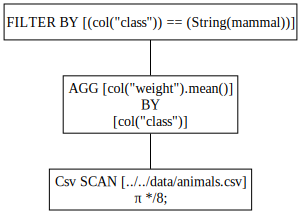

In [21]:
lazy_query.show_graph(optimized=False)

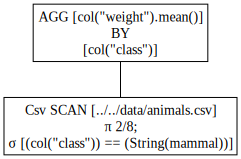

In [22]:
lazy_query.show_graph(optimized=True)

最適化前後の処理手順を見比べてみると、最適化後の方は、計算を実施した後にフィルタリングをするよりも、あらかじめフィルタリングした要素に対して計算した方が良いと判断している。  
直感的に考えても、先にフィルタリングした方が不必要な要素に対する計算をしなくて良いとわかるね

In [23]:
lazy_query.collect()  # 最適化した処理をここで初めて実施する

class,weight
str,f64
"""mammal""",1548.333333


データセットが小さい場合は、最適化の前後で対して差分が出ないと思うが、データ数が大きくなったり、複雑な大規模な計算が必要になったりすると、確かに有効になりそう。  
あと、polarsのDataFrame（今回だとLazyFrame）は実行手順を描画することができるっていう点で、人間が処理を追いやすい点が良いね

## pandasとpolarsでのメソッド名の違い

### 重複削除

pandas

In [24]:
animals_pd.drop_duplicates(subset='class')

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150000.0
1,duck,bird,8,least concern,3000.0
9,ray,fish,20,NaN,90000.0


polars

In [25]:
animals_pl.unique(subset='class')

animal,class,lifespan,status,weight
str,str,i64,str,i64
"""dolphin""","""mammal""",40,"""least concern""",150
"""duck""","""bird""",8,"""least concern""",3
"""ray""","""fish""",20,"""""",90


pandasだと`unique()`は要素を一意にしてくれる処理なので、結構使い方が違うなぁ

### 欠損値の削除

pandas

In [26]:
animals_pd.dropna(subset='weight')

,animal,class,lifespan,status,weight
0,dolphin,mammal,40,least concern,150000.0
1,duck,bird,8,least concern,3000.0
2,elephant,mammal,60,endangered,8000000.0
3,ibis,bird,16,least concern,1000.0
4,impala,mammal,12,least concern,70000.0
5,kudu,mammal,15,least concern,250000.0
7,panda,mammal,20,vulnerable,100000.0
8,polar bear,mammal,25,vulnerable,720000.0
9,ray,fish,20,NaN,90000.0


polars

In [27]:
animals_pl.drop_nulls(subset='weight')

animal,class,lifespan,status,weight
str,str,i64,str,i64
"""dolphin""","""mammal""",40,"""least concern""",150
"""duck""","""bird""",8,"""least concern""",3
"""elephant""","""mammal""",60,"""endangered""",8000
"""ibis""","""bird""",16,"""least concern""",1
"""impala""","""mammal""",12,"""least concern""",70
"""kudu""","""mammal""",15,"""least concern""",250
"""panda""","""mammal""",20,"""vulnerable""",100
"""polar bear""","""mammal""",25,"""vulnerable""",720
"""ray""","""fish""",20,"""""",90


これに関してはpolarsが`NaN`を使わないので、合点がいく

### ソート

pandas

In [28]:
animals_pd.sort_values('weight', ascending=False)

,animal,class,lifespan,status,weight
2,elephant,mammal,60,endangered,8000000.0
8,polar bear,mammal,25,vulnerable,720000.0
5,kudu,mammal,15,least concern,250000.0
0,dolphin,mammal,40,least concern,150000.0
7,panda,mammal,20,vulnerable,100000.0
9,ray,fish,20,NaN,90000.0
4,impala,mammal,12,least concern,70000.0
1,duck,bird,8,least concern,3000.0
3,ibis,bird,16,least concern,1000.0
6,narwhal,mammal,40,near threatened,NaN


polars

In [29]:
animals_pl.sort('weight', descending=True)

animal,class,lifespan,status,weight
str,str,i64,str,i64
"""narwhal""","""mammal""",40,"""near threatened""",null
"""elephant""","""mammal""",60,"""endangered""",8000
"""polar bear""","""mammal""",25,"""vulnerable""",720
"""kudu""","""mammal""",15,"""least concern""",250
"""dolphin""","""mammal""",40,"""least concern""",150
"""panda""","""mammal""",20,"""vulnerable""",100
"""ray""","""fish""",20,"""""",90
"""impala""","""mammal""",12,"""least concern""",70
"""duck""","""bird""",8,"""least concern""",3


pandasとpolarsでソートする順番が`ascending`か`descending`で、意味が真逆なのはややこしいなぁ。  
でも、ソートのデフォルトのイメージは小さい順（アルファベット順が特にイメージ強い）なので、個人的にはpolarsの方が好きかも

### カラムの型を変換

pandas

In [30]:
animals_pd.assign(lifespan=animals_pd['lifespan'].astype(float))

,animal,class,lifespan,status,weight
0,dolphin,mammal,40.0,least concern,150000.0
1,duck,bird,8.0,least concern,3000.0
2,elephant,mammal,60.0,endangered,8000000.0
3,ibis,bird,16.0,least concern,1000.0
4,impala,mammal,12.0,least concern,70000.0
5,kudu,mammal,15.0,least concern,250000.0
6,narwhal,mammal,40.0,near threatened,NaN
7,panda,mammal,20.0,vulnerable,100000.0
8,polar bear,mammal,25.0,vulnerable,720000.0
9,ray,fish,20.0,NaN,90000.0


polars

In [31]:
animals_pl.with_columns(pl.col('lifespan').cast(pl.Float64))

animal,class,lifespan,status,weight
str,str,f64,str,i64
"""dolphin""","""mammal""",40.0,"""least concern""",150
"""duck""","""bird""",8.0,"""least concern""",3
"""elephant""","""mammal""",60.0,"""endangered""",8000
"""ibis""","""bird""",16.0,"""least concern""",1
"""impala""","""mammal""",12.0,"""least concern""",70
"""kudu""","""mammal""",15.0,"""least concern""",250
"""narwhal""","""mammal""",40.0,"""near threatened""",null
"""panda""","""mammal""",20.0,"""vulnerable""",100
"""polar bear""","""mammal""",25.0,"""vulnerable""",720


`astype()`よりも`cast()`の方が直感的にわかりやすい単語な気がして、これもpolarsの方が好きかも。  
その代わり、pythonでfloatの桁数とかを普段考えることが少ないので、polarsでcastする際には、きちんとビット数を指定しないといけないという点で、やや容易さに欠ける気がする。  
まぁ、numpy使っていればビット数を指定するはずなので、慣れの問題かも。

### 行の集計

pandas

In [32]:
animals_pd.groupby(['class', 'status'])[['weight']].mean()

weight
class  status                       
bird   least concern    2.000000e+03
mammal endangered       8.000000e+06
       least concern    1.566667e+05
       near threatened           NaN
       vulnerable       4.100000e+05

polars

In [33]:
animals_pl.group_by(['class', 'status']).agg(pl.col('weight').mean())

class,status,weight
str,str,f64
"""fish""","""""",90.0
"""mammal""","""near threatened""",null
"""mammal""","""least concern""",156.666667
"""bird""","""least concern""",2.0
"""mammal""","""endangered""",8000.0
"""mammal""","""vulnerable""",410.0


pandasは`[`,`]`を使うことによって、短く簡潔に記述できるけれど、反面可読性が落ちると言われたらその通り。  
ただ、polarsは`[`,`]`を乱用しないのでややこしくなりにくい記述はできるだろうけれど、記述量が増えてしまうのか